In [1]:
import pandas
import pyreadstat
import seaborn as sns
import sklearn

In [2]:
df,meta = pyreadstat.read_sav("ai1983-2021.sav",encoding="latin1")
dfx,metax = pyreadstat.read_sav("dumped_mining_data.sav",encoding="latin1")
print(dfx["acccode"])
df.info()


0         13.0
1         13.0
2         13.0
3         12.0
4         13.0
          ... 
711955     0.0
711956     0.0
711957     0.0
711958     0.0
711959     0.0
Name: acccode, Length: 711960, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711960 entries, 0 to 711959
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   mineid    711960 non-null  object 
 1   contract  48219 non-null   object 
 2   subunit   711960 non-null  float64
 3   month     711960 non-null  float64
 4   day       711960 non-null  float64
 5   time      653376 non-null  float64
 6   inspoff   711960 non-null  float64
 7   state     711960 non-null  float64
 8   county    711960 non-null  float64
 9   sic       711956 non-null  float64
 10  canvass   711956 non-null  float64
 11  uloc      711959 non-null  float64
 12  umeth     247659 non-null  float64
 13  tradnm    339858 non-null  float64
 14  minemach  339904 non-null  float6

In [3]:
df.describe()
print(df["mwactiv"].value_counts())

28.0     130114
39.0      81552
30.0      64713
92.0      52148
23.0      41607
          ...  
5.0          29
81.0         15
68.0         15
100.0        10
84.0          7
Name: mwactiv, Length: 100, dtype: int64


In [40]:
def splitu(x):
    mwactivke = x.split("\n")
    if "" in mwactivke:
        mwactivke.remove("")
    

    mwak = {}
    for k in mwactivke:
        if k.lower().startswith("page") == False and k.lower().startswith("spss") == False:
            y = k.split(" ",1)
            if str(y[0]) not in ["NaN","nan"]:
                int(y[0])
                mwak[y[0]] = y[1]
            mwak["NaN"] = "Invalid"
            mwak["nan"] = "Invalid"
    return mwak
def encf(k,d,inv={"NaN":"invalid","nan":"invalid","keyerror_inv":"INVALID KEY"}):
    al = list(df[k])
    el = []
    p = 0
    for i in al:

        if str(i) in inv:
            el.append(inv[str(i)])
        else:
            try:
                if type(i) == float:
                    i = round(i)

                el.append(d[str(i)])
            except KeyError:
                el.append(inv["keyerror_inv"])
        p+=1
        if p % 5000 == 0:
            print(p)
    df[k + "_encoded"] = el

In [5]:
x = """1 Accident recovery (equipment & workers)
2 Advance longwall roof support
3 Blasting; shoot coal
4 Blow gun to blow out drilled holes
5 Brush floor
6 Bar down face, rib or side, etc.
7 Caging; operate elevator; manlift; etc.
8 Cement work; gunite crew, etc.
9 Change house, bathing; changing clothes, etc.
10 Chute, pull or free
11 Clean up
12 Climb in raise/shaft/manway
13 Climb scaffolds/ladders/platforms; headframe/derrick/towers
14 Climb on piled material/ore/rock/timber/stone
15 Couple/uncouple mine car/tractor/jeep, etc.
16 Crawling/kneeling
17 Cross over (conveyor)
18 Double jack
19 Drill face/rib/side/down/rise (NOT ROOF BOLTER)
20 Electrical maintenance/repair
21 Environmental tests/checks
22 Escaping a hazard
23 Get on or off equip. machines, etc.
24 Grinding
25 Hand load; hand shoveling/mucking
26 Handling coal, rock, waste or ore
27 Handling explosives
28 Handling supplies or material, load and unload
29 Handling timber
30 Hand tools (not powered)
31 Hand tools (powered)
32 Hang or reposition tubing/pipe/rope/wire etc.
33 Horseplay
34 Idle (eat lunch, coffee break, etc.)
35 Impactor
36 Inspect equipment
37 Investigate, enter, or work in bins, tanks, etc.
38 Lay or repair railroad track/roadbed, switching tracks, etc.
39 Machine maint./repair
40 Move power cable
41 Moving equipment
42 Observe operations
43 Office and lab work
44 Auger (surface mine)
45 Auger (underground mine)
46 Barge, boat, dredge
47 Bulldozer
48 Coal tipple/crusher/cleaning plant/breaker
49 Continuous miner
50 Conveyor belt (not riding)
51 Cutting machine
52 Fork lift
53 Front-end loader
54 Grader
55 Haulage truck
56 Hoist
57 Jitney
58 Load-haul-dump
59 Loading machine
60 Locomotive (air trammer)
61 Longwall, shear, plow
62 Mantrip
63 Mill equipment
64 Mucking machine
65 Power shovel/dragline/backhoe
66 Rock dust machine
67 Scraper (rig); cans, etc.
68 Shortwall
69 Shuttle car
70 Slusher
71 Utility truck
72 Surface equipment NEC
73 Underground equipment NEC
74 Remove or position hydraulic jack
75 Rerail equipment
76 Ride equipment
77 Roof bolter, drilling
78 Roof bolter, inserting bolt
79 Roof bolter, tramming
80 Roof bolter, NEC
81 Sand fill (backfilling stopes w/sand, gob, etc.)
82 Set brattice
83 Set/remove/relocate props
84 Skip pocket (pull/free)
85 Spot cars; drop cars
86 Sprag/block/chock mine cars or other track equip.
87 Supervise
88 Surface construction NEC
89 Timbering (includes lagging and cribbing)
90 Travel to and from work location
91 Ventilation (maintenance/installation)
92 Walking/running
93 Welding and cutting
94 Wetting down working place
95 Working w/solvents
96 Working w/chemicals
97 Working w/noxious materials NEC
98 Other NEC
99 Unknown
100 Undefined by MSHA"""

mwak = splitu(x)


In [ ]:
def enc(d,k,inv=[],ink="invalid"):
    x = df[d]
    for i in x:
        if type(i) != str and str(i) not in inv:
            x = x.replace(float(i),k[str(round(i))])
        else:
            x = x.replace(str(i),k[str((i))])
    print("X:")

    print(x.value_counts())
    return x
def mwac(id):
    return mwak[id]
#mwac("49")
print(df["mwactiv"].value_counts())
enc("mwactiv",mwak,inv=["NaN","nan"])

In [25]:
mwactiv_list = list(df["mwactiv"])
mw_encoded_list = []
p = 0
for i in mwactiv_list:
    if type(i) == float:
        i = round(i)
    if str(i) in ["NaN","nan"]:
        mw_encoded_list.append("invalid")
    else:
        
        mw_encoded_list.append(mwak[str(i)])
    p+=1
    if p % 5000 == 0:
        print(p)
df["mwactiv_encoded"] = mw_encoded_list

53
93
26
55
28
28
28
36
53
39
28
93
28
39
39
28
23
24
8
28
20
93
39
20
93
93
87
11
31
39
39
20
23
58
72
93
39
39
30
31
39
39
72
22
30
39
39
20
93
28
28
39
30
87
39
39
31
4
93
39
39
28
28
30
93
28
13
99
23
30
39
20
23
30
23
55
28
39
30
30
28
55
30
47
20
20
55
55
93
23
39
30
30
28
28
28
23
92
39
28
34
39
92
30
28
23
72
92
92
39
28
24
23
28
31
7
92
92
39
28
31
26
30
21
92
26
28
20
39
31
55
39
30
28
23
25
28
30
39
39
39
43
28
31
54
15
7
28


ValueError: cannot convert float NaN to integer

In [11]:
print(df["mwactiv_encoded"].value_counts())

Handling supplies or material, load and unload      130114
Machine maint./repair                                81552
invalid                                              70985
Hand tools (not powered)                             64713
Walking/running                                      52148
                                                     ...  
Brush floor                                             29
Sand fill (backfilling stopes w/sand, gob, etc.)        15
Shortwall                                               15
Undefined by MSHA                                       10
Skip pocket (pull/free)                                  7
Name: mwactiv_encoded, Length: 101, dtype: int64


In [37]:
se = splitu("1 M\n2 F")
print(se)
df['sex'].value_counts()
encf("sex",se,inv={"NaN":"not specified gender","nan":"not specified gender","":"not specified"})
print(df["sex_encoded"].value_counts())

{'1': 'M', 'NaN': 'Invalid', 'nan': 'Invalid', '2': 'F'}
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
6900

In [38]:
print(df['age'].describe())
df['age'].value_counts()

count    624789.000000
mean         39.421054
std          11.103059
min           1.000000
25%          31.000000
50%          39.000000
75%          47.000000
max          96.000000
Name: age, dtype: float64


36.0    20759
35.0    20425
37.0    20090
34.0    20053
38.0    20049
        ...  
91.0        7
92.0        7
93.0        7
10.0        3
96.0        1
Name: age, Length: 94, dtype: int64

In [42]:
x = """NaN NaN
1 Beltman, Conveyor man and belt worker, Mobile bridge carrierman, Feeder operator, Conveyor rider
2 Electrician, Lineman
3 Electrician helper
4 Maintenance man, Mechanic, Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech
5 Mechanic helper
6 Rock duster
7 Blaster, Shooter, Shotfirer, Explosive worker, Powder gang/monkey
8 Stopping builder, Ventilation man, Mason man, Overcast
9 Supply man, Supply worker, Nipper
10 Timberman
11 Wireman, Communications man
15 Fan attendant
16 Laborer, Bull gang, Faceman, Parts runner, Roustabout, Roof trimmer/scaler
24 Apprentice, Trainee
28 Scoop car/Scooptram operator, Load/Haul/Dump (LHD) operator, Teletram operator
32 Brattice man/worker
33 Drill helper
34 Driller operator
35 Continuous miner helper, Coal mole helper, Bridgeman
36 Continuous miner operator, Coal mole operator
37 Cutting machine helper, Undercutter operator helper
38 Cutting machine operator, Ripper, Universal operator
39 Hand loader, Hand trammer
40 Headgate operator
41 LW Propman, Propman helper, Move crew if LW, Move-up man, Jacksetter, Advanceman LW helper
42 Loading machine/Gather arm loader helper
43 Gathering arm loader operator, Loading machine operator, Joy loader operator
44 Longwall operator, Chock operator, Shear operator, Plow operator
45 Chute blaster, Rockman, Hang-up man, Raise blaster
46 Roof bolter, Rock bolter, Pinner, Mobile roof support operator (MRS)
47 Roof bolter helper, Rock bolter helper, Pinner helper
48 Roof bolter (mounted) (return side)
49 Section foreman, Bullgang foreman, Labor foreman, Leadman, Shift boss
50 Shuttle car operator, Mantrip operator, Ramcar operator, Rail runner, Buggy operator
51 Stall driver
52 Tailgate operator
53 Utility man, Errand boy, Service truck operator
54 Discontinued 1/31/2014. Several other codes cover Scoop Car Operator
63 Ledgeman/hand, Quarry man
67 Power shovel operator
68 Bulldozer operator, Universal operator, Heavy equipment operator, Operating engineer
70 Auger operator, Auger Crew Supervisor
75 Grader operator
76 Truck driver
78 Backhoe operator, Trackhoe operator, Crane operator
82 Front-end loader operator
89 Shaftcrew, Shaft repair, Skip tender, Station tender
99 Miner, NEC
101 Beltman, Conveyor man and belt worker, Mobile bridge carrierman, Feeder operator, Conveyor rider
102 Electrician, Lineman
103 Electrician helper
104 Maintenance man, Mechanic, Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech
105 Mechanic helper
106 Rock duster
108 Stopping builder, Ventilation man, Mason man, Overcast
109 Supply man, Supply worker, Nipper
110 Timberman
111 Wireman, Communications man
112 Belt vulcanizer
113 Cleanup man, Cleanup worker
114 Coal sampler
116 Laborer, Bull gang, Parts runner, Roustabout, Roof trimmer/scaler
117 Rodman, Surveyor/Transit helper
118 Greaser, Grease man, Oiler, Lube man, Dragline oiler
119 Welder
122 Coal dump operator
123 Transit man, Surveyor/Transit worker
124 Apprentice, Trainee
128 Scoop tram operator, Load/Haul/Dump operator
146 Roof bolter, Rock bolter, Pinner, Mobile roof support operator (MRS)
149 Bull gang foreman, Labor foreman, Leadman, Section foreman, Shift boss
154 Belt cleaner, Picker
156 Rock driller
157 Pumper
159 Water line man
160 Shopman
163 Ledgeman/hand, Quarry man
168 Bulldozer operator, Universal operator, Heavy equipment operator, Operating engineer
170 Car loader
175 Grader operator
176 Truck driver
178 Backhoe operator, Trackhoe operator, Crane operator
182 Front-end loader operator
189 Shaftcrew, Shaft repair, Skip tender, Station tender
199 Miner, NEC
201 Beltman, Conveyor man and belt worker, Mobile bridge carrierman, Feeder operator, Conveyor rider
216 Trackman, Track worker, Track gang
220 Cage/Cager/Station attendant
221 Hoistman, Hoist operator
224 Underground transportation trainee
240 Loader head operator, Roscoe operator
250 Shuttle car operator, Mantrip operator, Ramcar operator, Rail runner, Buggy operator
262 Brakeman, Roperider, Car runner, Spotterman, Snapper, Trip rider, Car rider, Flagman
265 Dispatcher
269 Motorman, Motor person, Swamper, Switchman, Locomotive operator
276 Driver, Jeep driver, Tractor operator
289 Shaftcrew, Shaft repair, Skip tender, Station tender
299 Miner, NEC
301 Beltman, Conveyor man and belt worker, Mobile bridge carrierman, Feeder operator, Conveyor rider
Page 16 of 25
SPSS Data Dictionary for MSHA Accident/Injury/Illness Files 9/26/2016
302 Electrician, Lineman
303 Electrician helper
304 Maintenance man, Mechanic, Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech
305 Mechanic helper
306 Welder (non-shop)
307 Blaster, Shooter, Shotfirer, Explosive worker, Powder gang/monkey
308 Mason
309 Supply man, Nipper
310 Scraper-loader operator
311 Wireman, Communications man
312 Belt vulcanizer
313 Cleanup man, Cleanup worker
314 Coal samplers
315 Fan attendant
316 Laborer, Blacksmith, Bull gang, Parts runner, Roustabout, Pick-up man, Pitman
317 Rodman, Surveyor/Transit helper
318 Greaser, Grease man, Oiler, Lube man, Dragline oiler
319 Welder (shop)
320 Cage/Cager/Station attendant, Aerial tram (outside only)
321 Hoistman, Hoist operator
322 Coal strip operator
323 Transit man, Surveyor/Transit worker
324 Backhoe operator, Trackhoe operator
326 Forklift operator
327 Pumper
328 Utility man, Shift tech, Service/Dump truck operator
329 Vacuum filter operator, Flotation mill/Concentrator operator, Flotation plant operator
331 Clam/Clamshell operator, Claw operator
333 Drill helper
334 Drill operator
340 Boom operator
342 Bit sharpener, Bit grinder, Grinder
343 Car trimmer, Car loader, Bin puller, Truck loader
345 Crusher attendant/operator, Pan feeder operator/worker
347 Froth cell operator, Flotation mill operator, Concetrator operator
348 Machinist
349 Rotary dump operator, Car dump operator
350 Shuttle car operator, Mantrip operator, Ramcar operator, Rail runner, Buggy operator
351 Scoop tram operator, Load/Haul/Dump operator
352 Steel worker, Iron metal worker, Iron worker
353 Trespasser
354 Sweeper operator
355 Chainman, Surveyor/Transit helper
356 Rock driller
357 Washer operator, Sizing operator
358 Water circuit operator, Slurry operator, Mix operator, Pump operator worker
360 Shopman repair cars, Mechanic
362 Brakeman, Roperider, Car runner, Spotterman, Snapper, Trip rider, Car rider, Flagman
363 Ledgeman/hand, Quarry man
364 Janitor
365 Dispatcher
366 Waterboy
367 Coal/ore shovel operator, Shoveler, Power shoveler
368 Bulldozer operator, Universal operator, Heavy equipment operator, Operating engineer
369 Motorman, Motor person, Swamper, Switchman, Locomotive operator
370 Auger operator, Auger Crew supervisor
371 Auger helper
372 Barge/Boat/Dredge/Towbarge/Towboat/Leach operator, Riverman, Deck hand
373 Car dropper, Car shake out operator
Page 17 of 25
SPSS Data Dictionary for MSHA Accident/Injury/Illness Files 9/26/2016
374 Warehouseman, Bagger, Palletizer/Stacker, Storekeeper, Packager, Fabricator, Cleaning plant operator
375 Grader operator, Roadgrader operator
376 Haul/Off road/Coal/Ore/Pit/Quarry/Rock/Rubber tire truck driver, Transportation truck driver
378 Crane operator, Mobile equipment operator (MEO), Dragline operator, Dropball operator, Rigger
379 Dryer operator, Kiln operator, Dry plant operator, Fluid operator, Bed dryer operator
380 Fine coal plant operator
381 Hoist operator helper
382 Front-end loader, Scraper-loader operator, Pan operator, Payloader, Scraper rig operator
383 Driller, Highwall helper, Highwall drill helper
384 Driller, Highwall operator, Highwall drill operator
385 Lampman, Lamp person
386 Refuse truck driver, Backfill truck driver, Stock pile truck driver
387 Rotary bucket excavator operator
388 Scalper-screen operator
389 Shaft repair, Skip tender, Station tender
390 Silo operator, Bin puller, Truck loader
391 Boomcat operator, Stripping shovel operator
392 Tipple/Top lander/Skip dumper operator, Binman, Topman
393 Weighman, Scale person
394 Carpenter
395 Water truck operator
396 Security guard, Watchman
397 Fireman - locomotive, Railroad clam operator, Timekeeper, Yard engine operator
398 Groundman, Yardman
399 Miner, Prospector, NEC
402 Master electrician
404 Master mechanic, Foreman, Supervisor
414 Quality control technician, Laboratory technician, Laboratory assistant
418 Belt foreman, Maintenance foreman, Maintenance supervisor
423 Draftsman, Surveyor/Transit work supervisor
430 Assistant mine foreman, Assistant mine manager
449 Mine manager, Mine foreman, Mine owner
456 Assayer, Geologist, Metallurgist, Engineer, Engineer management
462 Examiner, Fire boss, Pre-shift examiner, Mine examiner
464 Inspector
481 Superintendent
489 Outside foreman, Leadman
494 Prep plant foreman, Supervisor, Mill plant supervisor, Kiln supervisor
495 Safety director
496 Union representative
497 Clerk, Timekeeper, Office worker, Director of sales
590 Education specialist
591 Mineral industrial safety officer
592 Mine safety instructor
593 Safety representative
594 Training specialist
601 Stoper miner
602 Drift miner
603 Raise miner
604 Mucking machine operator
605 Slusher operator
614 Wagon drill operator, Air-track driller, Carriage mounted drill operator
615 Rotary drill operator (electric/hydraulic)
618 Diamond drill operator, Core driller, Exploration driller, Longhole driller, Prospect driller
619 Drill helper, Chuck tender
620 Hand scaler
621 Raise borer operator
631 Ground controller
632 Cement worker, Concrete worker, Form man, Mandoseal man
Page 18 of 25
SPSS Data Dictionary for MSHA Accident/Injury/Illness Files 9/26/2016
634 Hangup worker, Chute blaster
635 Shotcrete, Gunite worker
636 Sandfiller (dry)
637 Sandfiller (wet), Slurry operator
638 Mechanical scaling worker
639 Skip tender, Station tender
640 Ball/Rod/Pebble/Hand/Limestone/Dry mill operator, Roller operator
641 Hammer mill operator, Breaker mill operator, Jaw mill operator
642 Stone finishing and sizing personnel, Stone/Rock cut/Polish/Saw operator, Splitter, Cutter, Trimmer
643 Hydrate plant operator
644 Dry screening plant operator, Screen house operator
646 Leaching operator
647 Pelletizing operator
648 Bagging, Package operator
649 Refinery worker
660 Ramcar operator
662 Grizzly worker, Grizzly tender, Grizzlyman, Chute puller, Chute tapper
664 Hand trammer
670 Janitor
672 Building repair man, Maintenance
673 Lab Technician
674 Warehouse, Supply handler
675 Plumber, Pipefitter, Millwright
677 Bobcat operator
678 Painter
679 Jackhammer operator, Chiphammer operator"""
occu = splitu(x)
print(df["occup"].value_counts())
def occup(id):
    return occu[id]
occup("304")
encf("occup",occu)
print(df["occup_encoded"].value_counts())

304.0    8846
316.0    4835
374.0    4109
368.0    3265
116.0    2888
         ... 
224.0       1
373.0       1
355.0       1
602.0       1
603.0       1
Name: occup, Length: 237, dtype: int64
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
5

In [43]:
x = """0 No Injury
1 Death, fatal
2 Permanent disability, partial or total
3 Days away from work only
4 Days away AND restricted activity
5 Days of restricted activity only
6 Injuries w/o death, days away, or restrict. act.
7 Occupational illness, (NOT 1-6)
8 Employee natural caused fatal & nonfatal injury
9 Non-employee fatal & nonfatal cases
10 All other cases (inc. 1st aid)"""
deginj = splitu(x)
print(deginj)
encf("deginj",deginj)
print(df["deginj_encoded"].value_counts())

{'0': 'No Injury', 'NaN': 'Invalid', 'nan': 'Invalid', '1': 'Death, fatal', '2': 'Permanent disability, partial or total', '3': 'Days away from work only', '4': 'Days away AND restricted activity', '5': 'Days of restricted activity only', '6': 'Injuries w/o death, days away, or restrict. act.', '7': 'Occupational illness, (NOT 1-6)', '8': 'Employee natural caused fatal & nonfatal injury', '9': 'Non-employee fatal & nonfatal cases', '10': 'All other cases (inc. 1st aid)'}
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
39000

In [44]:
x = """1 Death
2 Serious injury
3 Entrapment
4 Inundation
Page 24 of 25
SPSS Data Dictionary for MSHA Accident/Injury/Illness Files 9/26/2016
5 Gas or dust explosion
6 Mine fire
7 Explosives
8 Roof fall
9 Outburst
10 Impounding dam
11 Hoisting
12 Offsite injury
13 Not labeled
0 Not labeled"""
acccod = splitu(x)
encf("acccode",acccod)
print(df["acccode_encoded"].value_counts())

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
Not labeled              6

In [ ]:
class codes:
    def __init__(self,df,mw,s,o,d,c):
        self.df = df
        self.mwactiv = mw
        self.sex = s
        self.occupation = o
        self.deginj = d
        self.accident_code = c
    def df(self,v):
        return self.df[v]
    def vc(self,v):
        return df[v].va
    def dispvc(self,v):
        #for k
        pass

codes(df,mwac,se,occu,deginj,acccod)

In [ ]:
df_sm = df.sample(1000)
sns.histplot(data=df_sm, bins=20,x="age",hue="time")

In [ ]:
df_sm = df.sample(1000)
sns.histplot(data=df_sm, bins=20,x="year",hue="time")

In [ ]:
df_sm = df.sample(1000)
sns.histplot(data=df_sm, bins=20,x="month",hue="time")

In [ ]:
# acccode , mwactiv, age, expjob


In [46]:
pyreadstat.write_sav(df, "dumped_mining_data.sav")

In [47]:
dfx,metax = pyreadstat.read_sav("dumped_mining_data.sav",encoding="latin1")

In [49]:
print(dfx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711960 entries, 0 to 711959
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   mineid           711960 non-null  object 
 1   contract         711960 non-null  object 
 2   subunit          711960 non-null  float64
 3   month            711960 non-null  float64
 4   day              711960 non-null  float64
 5   time             653376 non-null  float64
 6   inspoff          711960 non-null  float64
 7   state            711960 non-null  float64
 8   county           711960 non-null  float64
 9   sic              711956 non-null  float64
 10  canvass          711956 non-null  float64
 11  uloc             711959 non-null  float64
 12  umeth            247659 non-null  float64
 13  tradnm           339858 non-null  float64
 14  minemach         339904 non-null  float64
 15  modnum           711960 non-null  object 
 16  shift            670813 non-null  floa

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#convert categorical variables to strings

X = dfx[['mwactiv_encoded','sex_encoded','occup_encoded','deginj_encoded']] #columns used to predict go here
y = dfx[['acccode_encoded']] # column predicted goes here
encoder = OneHotEncoder(handle_unknown='ignore')

encoded_X = encoder.fit_transform(X)

scaler = StandardScaler(with_mean=False)

scaled_X = scaler.fit_transform(encoded_X)


sgdc = SGDClassifier()

sgdc.fit(scaled_X,y)

y_pred = sgdc.predict(scaled_X)

acc = accuracy_score(y,y_pred)

print(acc)


C:\Users\blzza\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9181892241137143


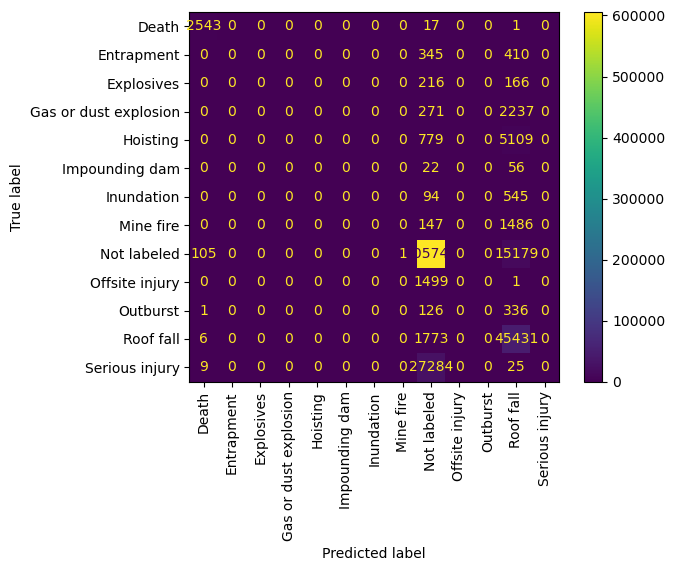

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, y_pred,xticks_rotation = 'vertical')